### Import variables from Step 1 Transformation Step
More info on "Stores variables, aliases and macros in IPython’s database." Follow the link: <a href="https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html">IPython Documentation</a> 

In [1]:
%store -r nationals
%store -r astros

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline

In [3]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

### Determine which player had the highest HR scores for each team

<Strong>Method</Strong>
 - Sort home run values for each team
 - Store player names and their home run values in lists
 - Use a scatter plot to visualize the home run hits by team

In [4]:
# Sort the dataframe by the home runs column using the .sort_values() method
astros = astros.sort_values(by=['HR'])
nationals  = nationals.sort_values(by=['HR'])

In [5]:
# Prepare a list for each team that has a) player name, and b) the home runs
# This general code will create a list of the data needed for 2d plotting: dataframe.column.values
astros_players = astros.Name.values
astros_home_runs = astros.HR.values
nationals_players = nationals.Name.values
nationals_home_runs = nationals.HR.values

In [6]:
# This function will create a list of color codes based on the home run value
# This list of color codes will be used in the scatter plot to aid in the data visualization
def color_dots(team_scores, team_color):
    for i in team_scores:
        if i >= 25:
            team_color.append('r')
        elif i >= 20:
            team_color.append('orange')
        elif i >= 15:
            team_color.append('y')
        else:
            team_color.append('b')

In [7]:
# Initialize two empty lists to store the colors and invoke the color_dots function
astro_colors = []
nationals_colors = []
color_dots(astros_home_runs, astro_colors)
color_dots(nationals_home_runs, nationals_colors)

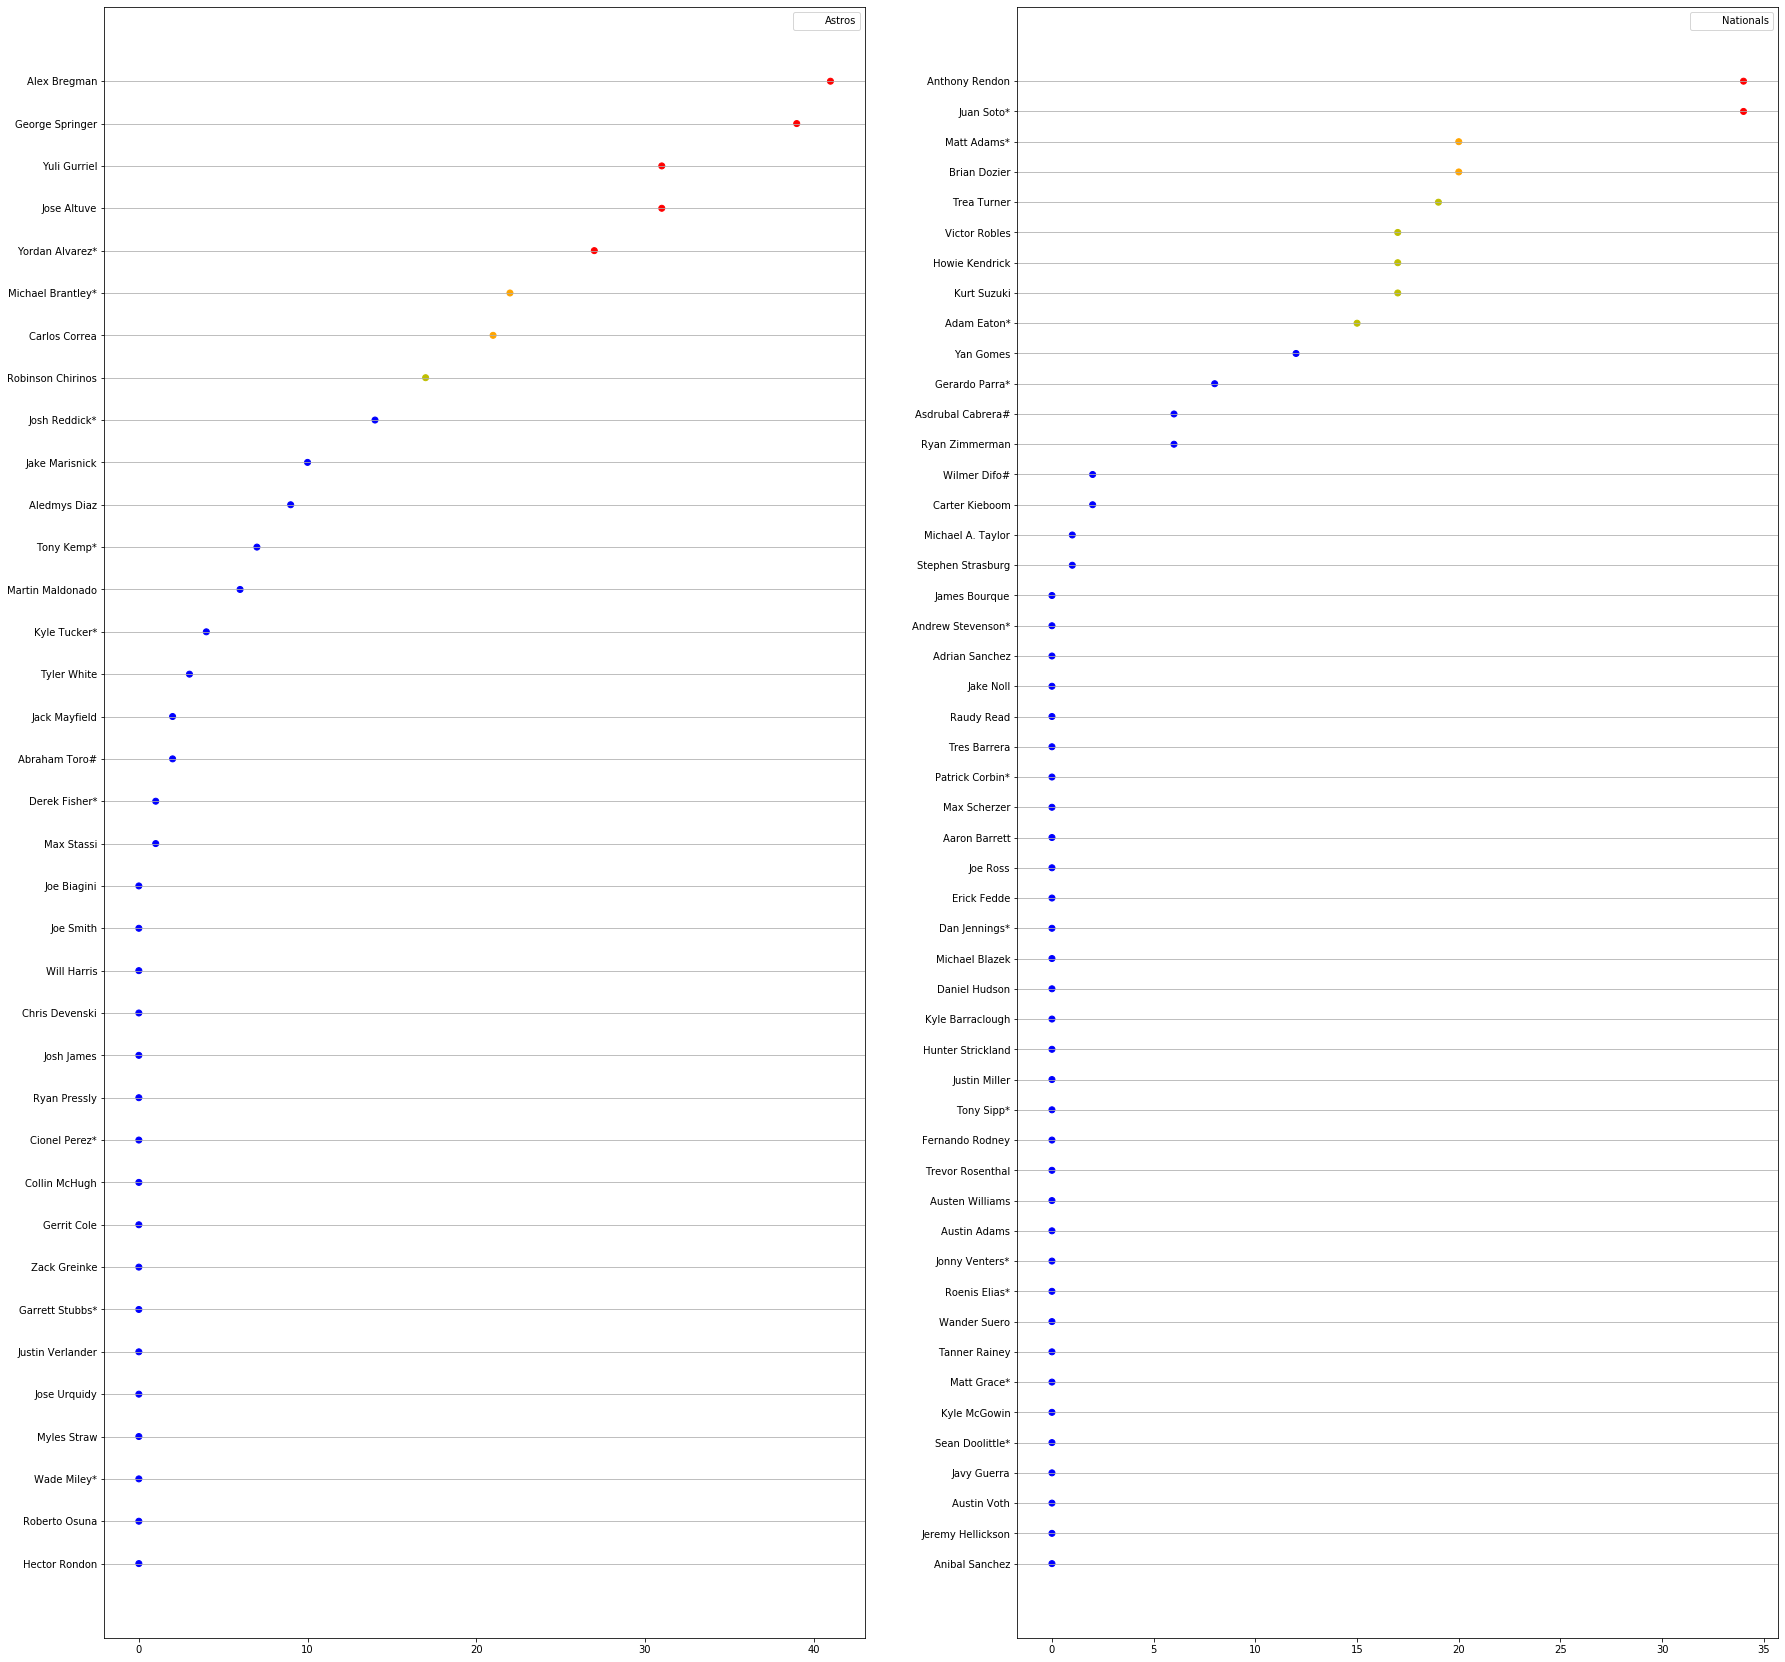

In [8]:
# Generate scatter plots

# To format the legend and remove the marker
astros_legend = mlines.Line2D([], [], color='white', marker='.',markersize=0, label='Astros')
nationals_legend = mlines.Line2D([], [], color='white', marker='.',markersize=0, label='Nationals')

# Plotting categorical variables, 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(30, 30), sharey=False)


# Astros Scatter Plot
axs[0].scatter(astros_home_runs, astros_players, color=astro_colors)
axs[0].grid(b=True, which='major', axis='y')
axs[0].legend(handles=[astros_legend])

# Nationals Scatter Plot
axs[1].scatter(nationals_home_runs, nationals_players, color=nationals_colors)
axs[1].grid(b=True, which='major', axis='y')
axs[1].legend(handles=[nationals_legend])
plt.show()
fig.savefig("static/images/2019_ws_hr_stats.png", bbox_inches='tight')

<h1 align="middle">Houston Astros Highest Home Run Batter</h1>

<img src="static/images/alex_bregman_astros.png" >
<div align="middle">
 - Third baseman / Shortstop<br>
 - Houston Atros since 2016<br>
 - Homeruns: 41<br>
</div>

<h1 align="middle">Washington Nationals Highest Home Run Batters (A TIE!)</h1>

<table align="middle">
<tr>
    <td> <img src="static/images/anthony_rendon_nationals.png" alt="Drawing" style="width: 250px;"/> 
    </td>
    <td> <img src="static/images/juan_soto_nationals.png" alt="Drawing" style="width: 250px;"/> </td>
   </tr>
     <tr>
    <td> Third baseman<br>Nationals since 2013<br>Homeruns:34
    </td>
    <td> Outfielder<br>Nationals since 2018<br>Homeruns:34
    </td>
   </tr>
    </table>

### Determine which of the two top National's home run batters had better overall stats.

<strong>Method</strong>
 - Prepare a dataframe with just Anthony and Juan's data
 - Filter out non-numeric columns
 - Iterate through each column, determine which player outperformed the other, and tally this up
 - Player with most wins per category will be selected for downstream analysis

In [9]:
# Filter out Anthony Rendon and Juan Soto's data
anthony_rendon = nationals[nationals["Name"].str.contains("Rendon")]
juan_soto = nationals[nationals["Name"].str.contains("Juan")]

In [10]:
# Use the .concat() method to create a dataframe with just the data for Anthony and Juan.
dfs = [anthony_rendon, juan_soto]
nat_top_batters = pd.concat(dfs)

In [11]:
# Store the name of numeric columns into a list
int_cols = []
for col in nat_top_batters:
    if nat_top_batters[col].dtype == int:
        int_cols.append(col)
    else:
        continue

In [12]:
# Subset player dataframe by numeric column list
nat_batter = nat_top_batters[int_cols]

In [13]:
# Iterate through each column, determine which player outperformed the other, and tally this up
# Create a counter for each player
anthony_wins = 0
juan_wins = 0

# Iterate through each column
for col in nat_batter:
    # Extract the value for each row in each column
    anthony = nat_batter[col].values[0]
    juan = nat_batter[col].values[1]
    
    # Compare value, and increase counter accordintly
    if anthony > juan:
        anthony_wins = anthony_wins + 1
    elif anthony < juan:
        juan_wins =  juan_wins + 1
    else:
        pass

### Washington Nationals Top Batter Selection

In [14]:
if anthony_wins > juan_wins:
    print(f"Anthony Rendon has {anthony_wins} wins, and this is {anthony_wins - juan_wins} more than wins than Juan Soto.")
elif anthony_wins < juan_wins:
    print(f"Anthony Rendon has {anthony_wins} wins, and this is {juan_wins - anthony_wins} more less wins than Juan Soto.")
else:
    pass

Anthony Rendon has 11 wins, and this is 4 more than wins than Juan Soto.
